In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# CSV file.
USinc = 'US_Average_Income.csv'

# Use the Pandas read_csv function to read the CSV file into a DataFrame.
dfinc = pd.read_csv(USinc)

# Now, 'df' is your DataFrame containing the data from the CSV file.

# You can perform various operations on the DataFrame, for example, printing the first few rows:
print(dfinc.head())

       YEAR  Us Average Income  Average income Change(non Percent)
0  1/1/1974               7255                            0.000000
1  1/1/1975               7704                            0.058281
2  1/1/1976               8242                            0.065275
3  1/1/1977               8886                            0.072474
4  1/1/1978               9451                            0.059782


In [2]:
# Use the describe() method to get summary statistics for numeric columns.
describeinc = dfinc.describe()
print(describeinc)

       Us Average Income  Average income Change(non Percent)
count          49.000000                           49.000000
mean        28796.489796                            0.041754
std         14730.225515                            0.022559
min          7255.000000                           -0.004449
25%         16170.000000                            0.024698
50%         28240.000000                            0.046392
75%         38380.000000                            0.058281
max         59430.000000                            0.080000


### US Average income graphs

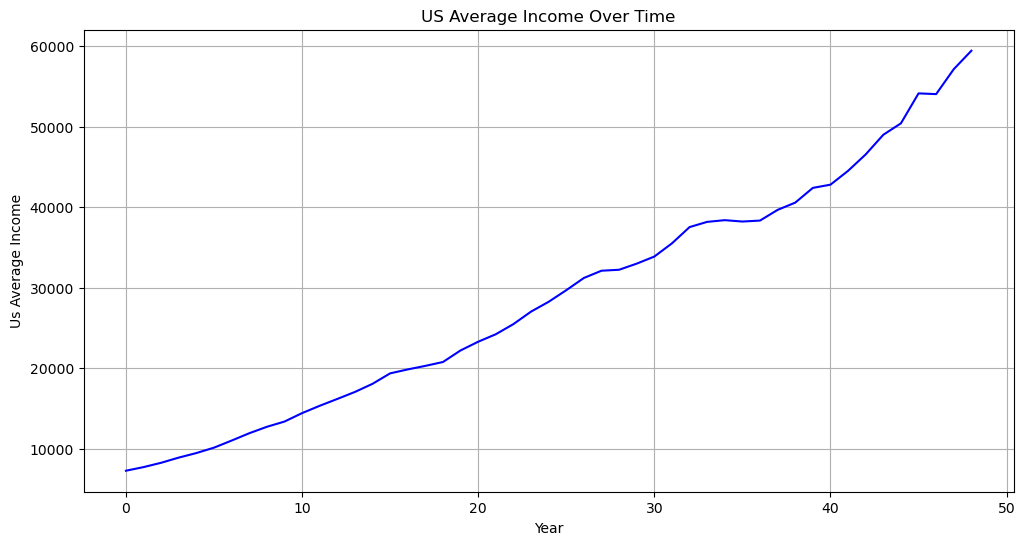

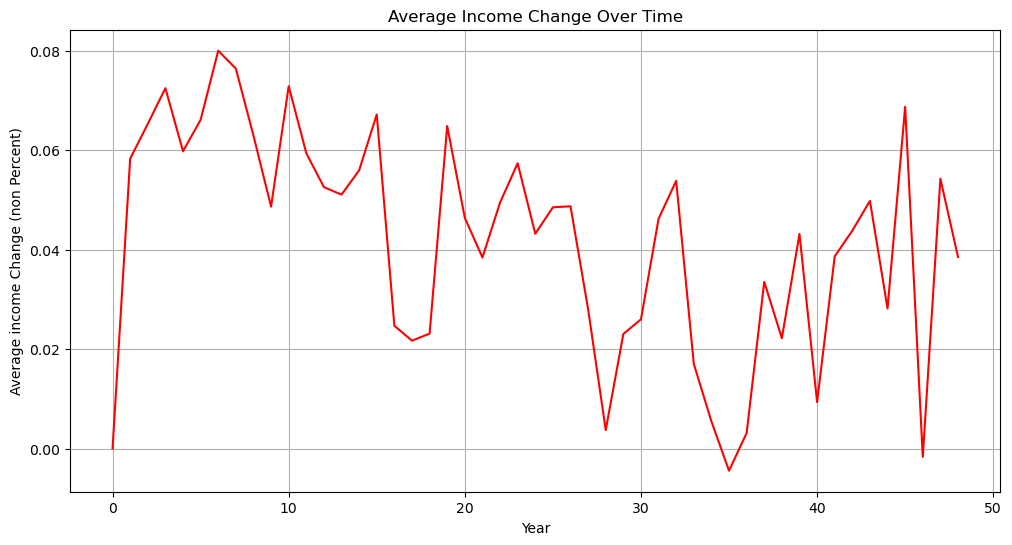

In [3]:
# Create a time series plot for 'Us Average Income'
plt.figure(figsize=(12, 6))
plt.plot(dfinc.index, dfinc['Us Average Income'], color='blue')
plt.xlabel('Year')
plt.ylabel('Us Average Income')
plt.title('US Average Income Over Time')
plt.grid()
plt.show()

# Create a separate time series plot for 'Average income Change (non Percent)'
plt.figure(figsize=(12, 6))
plt.plot(dfinc.index, dfinc['Average income Change(non Percent)'], color='red')
plt.xlabel('Year')
plt.ylabel('Average income Change (non Percent)')
plt.title('Average Income Change Over Time')
plt.grid()
plt.show()

### US Average Income Forecasted

C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informatio

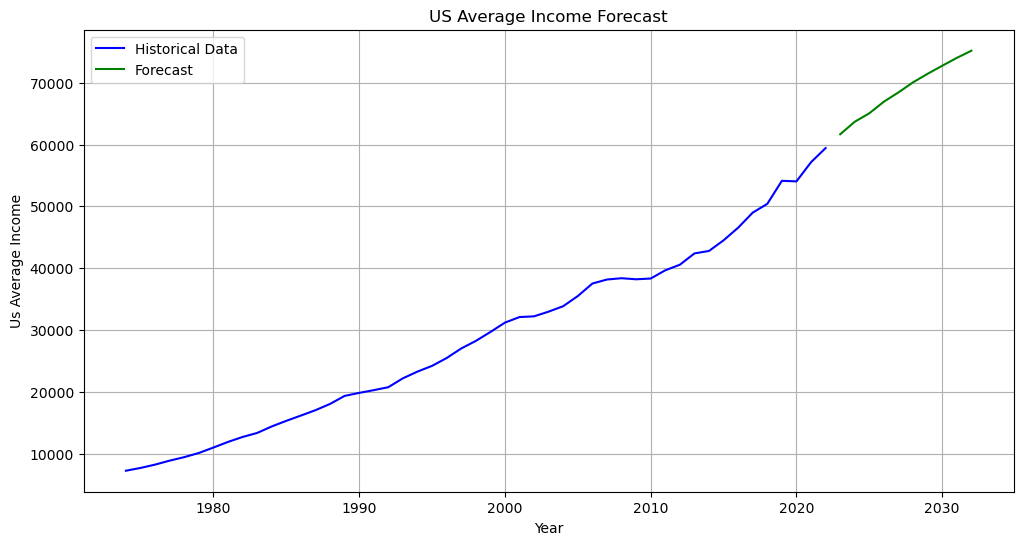

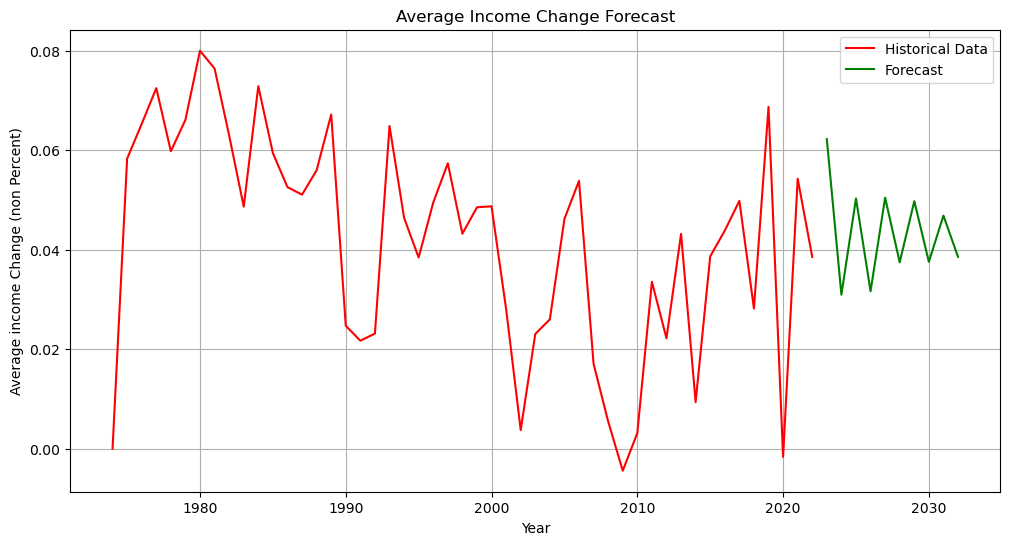

In [4]:
# Convert the 'Year' column to a datetime object
dfinc['YEAR'] = pd.to_datetime(dfinc['YEAR'])  # Update 'Year' to the actual column name

# Set the 'YEAR' column as the index
dfinc.set_index('YEAR', inplace=True)

# Fit an ARIMA model to the 'Us Average Income' data
model_income = ARIMA(dfinc['Us Average Income'], order=(5, 1, 0))  # You may need to adjust the order
model_income_fit = model_income.fit()

# Forecast the next 10 years (assuming annual data)
forecasted_income = model_income_fit.forecast(steps=10)

# Fit an ARIMA model to the 'Average income Change (non Percent)' data
model_change = ARIMA(dfinc['Average income Change(non Percent)'], order=(5, 1, 0))  # You may need to adjust the order
model_change_fit = model_change.fit()

# Forecast the next 10 years (assuming annual data)
forecasted_change = model_change_fit.forecast(steps=10)

# Create a time series plot for the forecasted 'Us Average Income'
plt.figure(figsize=(12, 6))
plt.plot(dfinc.index, dfinc['Us Average Income'], color='blue', label='Historical Data')
forecasted_income_index = pd.date_range(start=dfinc.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')
plt.plot(forecasted_income_index, forecasted_income, color='green', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Us Average Income')
plt.title('US Average Income Forecast')
plt.legend()
plt.grid()
plt.show()

# Create a time series plot for the forecasted 'Average income Change (non Percent)'
plt.figure(figsize=(12, 6))
plt.plot(dfinc.index, dfinc['Average income Change(non Percent)'], color='red', label='Historical Data')
forecasted_change_index = pd.date_range(start=dfinc.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')
plt.plot(forecasted_change_index, forecasted_change, color='green', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Average income Change (non Percent)')
plt.title('Average Income Change Forecast')
plt.legend()
plt.grid()
plt.show()

In [5]:
# Print the forecasted data
print("Forecasted Income:")
print(forecasted_income)

print("\nForecasted Change:")
print(forecasted_change)

Forecasted Income:
2023-01-01    61657.365711
2024-01-01    63682.565184
2025-01-01    65057.415406
2026-01-01    66931.802926
2027-01-01    68431.179132
2028-01-01    70059.029362
2029-01-01    71440.833380
2030-01-01    72738.037016
2031-01-01    74005.731444
2032-01-01    75165.001854
Freq: AS-JAN, Name: predicted_mean, dtype: float64

Forecasted Change:
2023-01-01    0.062220
2024-01-01    0.030950
2025-01-01    0.050289
2026-01-01    0.031636
2027-01-01    0.050448
2028-01-01    0.037454
2029-01-01    0.049747
2030-01-01    0.037549
2031-01-01    0.046846
2032-01-01    0.038562
Freq: AS-JAN, Name: predicted_mean, dtype: float64


### Housing prices

In [6]:
sprice= 'Average_sale_price_us_houses.csv'
dfsprice = pd.read_csv(sprice)
describesprice = dfsprice.describe()

In [7]:
print(dfsprice.head())

        DATE  Average Sale price US    Year  Average Sale Price(year)  \
0   1/1/1963                  19300  1963.0                   19375.0   
1   4/1/1963                  19400  1964.0                   20300.0   
2   7/1/1963                  19200  1965.0                   21450.0   
3  10/1/1963                  19600  1966.0                   22925.0   
4   1/1/1964                  19600  1967.0                   24125.0   

   Yearly Change  
0            NaN  
1         0.0456  
2         0.0536  
3         0.0643  
4         0.0497  


In [8]:
print(describesprice)

       Average Sale price US         Year  Average Sale Price(year)  \
count             243.000000    61.000000                 61.000000   
mean           181184.773663  1993.000000             182521.038251   
std            134528.379655    17.752934             136552.455321   
min             19200.000000  1963.000000              19375.000000   
25%             60450.000000  1978.000000              62700.000000   
50%            151100.000000  1993.000000             149075.000000   
75%            283900.000000  2008.000000             288225.000000   
max            552600.000000  2023.000000             535500.000000   

       Yearly Change  
count      60.000000  
mean        0.051623  
std         0.051177  
min        -0.073200  
25%         0.021775  
50%         0.053550  
75%         0.081850  
max         0.147700  


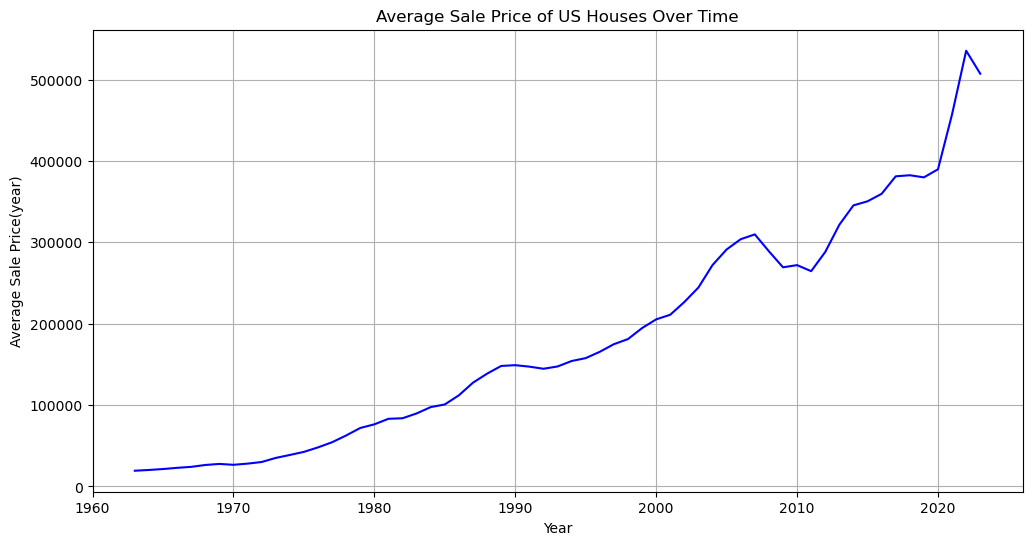

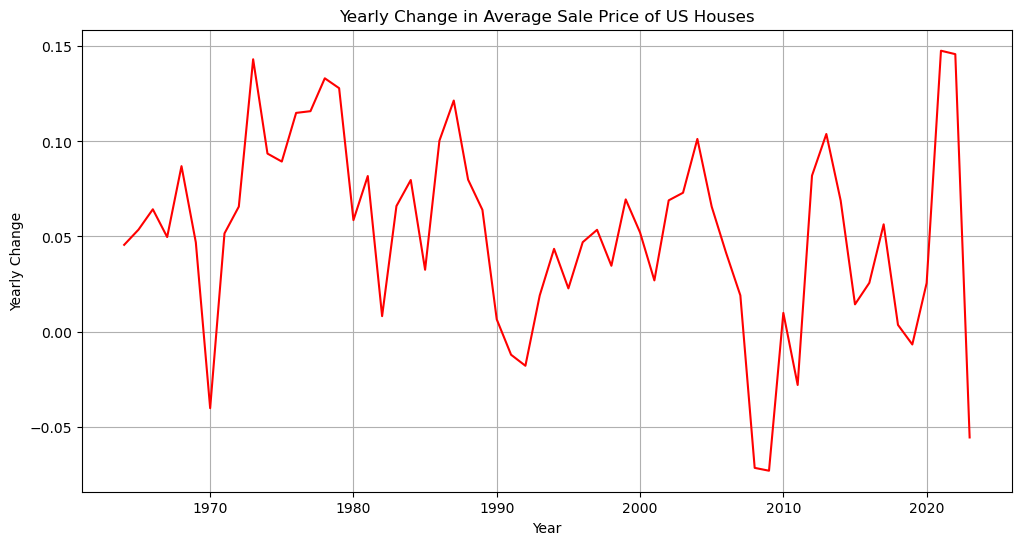

In [9]:
year = dfsprice['Year']
average_sale_price = dfsprice['Average Sale Price(year)']
yearly_change = dfsprice['Yearly Change']
# Create a time series plot for 'Average Sale Price(year)'
plt.figure(figsize=(12, 6))
plt.plot(year, average_sale_price, color='blue')
plt.xlabel('Year')
plt.ylabel('Average Sale Price(year)')
plt.title('Average Sale Price of US Houses Over Time')
plt.grid()
plt.show()

# Create a time series plot for 'Yearly Change'
plt.figure(figsize=(12, 6))
plt.plot(year, yearly_change, color='red')
plt.xlabel('Year')
plt.ylabel('Yearly Change')
plt.title('Yearly Change in Average Sale Price of US Houses')
plt.grid()
plt.show()